## LendingClusCaseStudy

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.

Objective is, using EDA understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment

### Steps followed:
* Data Cleaning
* Univariate Analysis
* Segemented Univariate Analysis
* Bivaraiate/Multivariate Analysis
* Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Dropping columns with all Null/NA values

In [4]:
df_noNA = df.dropna(axis=1, how="all", inplace=False)

After analysing the columns and values in Excel, we have columns with following type of values 
* Columns either has same or 1-2 values only.
* Columns having all Null/NA values

Removing these columns will not affect the observation.

In [5]:
drop_columns = ["policy_code", 
                "collections_12_mths_ex_med",
                "acc_now_delinq",
                "delinq_amnt",
                "tax_liens",
                "next_pymnt_d",
                "pymnt_plan",
                "application_type",
                "mths_since_last_delinq",
                "mths_since_last_record"
               ]
df_noNA.drop(labels = drop_columns, axis =1, inplace=True)

Some of the columns have values which will not be affecting the obervation, some of those types of columns are folllowing:
* Columns with only long text values
* Columns with ID, title etc

In [6]:
drop_columns_2 = ["url", "initial_list_status", "zip_code", "member_id", "desc","emp_title", "addr_state","id", "title"]
df_noNA.drop(labels = drop_columns_2, axis =1, inplace=True)

As per investment google search, some of the columns are just taken for records, post loan is approved.
In such cases, these columns will not be affecting the default outcome.

In [7]:
drop_columns_3 = ["delinq_2yrs", 
                  "total_rec_prncp", 
                  "total_rec_late_fee", 
                  "total_rec_int", 
                  "recoveries", 
                  "last_credit_pull_d", 
                  "last_pymnt_d", 
                  "chargeoff_within_12_mths"]
df_noNA.drop(labels = drop_columns_3, axis =1, inplace=True)

In [8]:
# Updated Dataframe
df_noNA.shape

(39717, 30)

Now, as next step in EDA, we will be analysing data in following sequence:
* Check for null/NA values
* Check for outliner

Following few lines of code block will handle null values present in the data.

In [9]:
df_noNA.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
dti                        float64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
collection_recovery_fee    float64
last_pymnt_amnt     

In [10]:
100 * df_noNA.isna().sum()/len(df.index)

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
collection_recovery_fee    0

Following columns have null/na values
* emp_length
* revol_util
* pub_rec_bankruptcies

In [11]:
df_noNA['emp_length'].isna().sum()

1075

In [12]:
# For catagorical columns, its suggested to use Mode to fill null values.
emp_length_mode = df_noNA['emp_length'].mode()[0]
df_noNA['emp_length'].fillna(emp_length_mode, inplace=True)

In [13]:
df_noNA['emp_length'].isna().sum()

0

In [14]:
df_noNA['revol_util'].isna().sum()

50

As per Data dictionary definition "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit" of revol_util, it does not seems we can use mean/median value to fill NA values for this 
column, better to remove all rows which has NA values corresponding to 'revol_util'

In [15]:
df_noNA.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

In [16]:
df_noNA['revol_util'].isna().sum()

0

In [17]:
df_noNA['pub_rec_bankruptcies'].isna().sum()

697

In [18]:
df_noNA['pub_rec_bankruptcies'].value_counts()

0.0    37290
1.0     1673
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [19]:
df_noNA['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [20]:
# Zero (0) is the most common value, so filling null/na values with zero (0)
pub_rec_bankruptcies_mode = df_noNA['pub_rec_bankruptcies'].mode()[0]
df_noNA['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode, inplace=True)

In [21]:
df_noNA['pub_rec_bankruptcies'].isna().sum()

0

In [22]:
100 * df_noNA.isna().sum()/len(df.index)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
collection_recovery_fee    0.0
last_pymnt_amnt            0.0
pub_rec_bankruptcies       0.0
dtype: float64

At this stage, we are in following state:
* Columns which will not affect the observation are cleaned
* Data corresponding to null/na data are cleaned

# Uni-variant Analysis

Further Data processing is required, for which following steps will be taken
* Re-structure data in proper format
* Add new columns, which could help in analysis

In [23]:
# Convert emp_length to int, as per given in data_dict.
# for value which are na, retur 0
def get_emp_length(x):
    if '<' in x:
        return int(x.split()[1])
    elif '+' in x:
        return int(x.split()[0][:-1])
    else:
        return int(x.split()[0])

In [24]:
def save_dataframe_to_csv(df_obj, file_name=None):
    '''
    Util method to save a Dataframe to CSV file
    input: dataframe
    output: CSV file
    return: None
    '''
    df = df_obj.reindex(sorted(df_obj.columns), axis=1)
    new_file_name = 'loan_New.csv'
    if file_name != None:
        new_file_name = "{0}-{1}.csv".format(file_name[:file_name.index(".")], "New")

    df.to_csv('loan_New.csv', sep=',', index=False)

In [25]:
df_noNA['int_rate'] = df_noNA['int_rate'].apply(lambda x: x[:-1])

In [26]:
df_noNA['int_rate'] = df_noNA['int_rate'].apply(pd.to_numeric)

In [27]:
df_noNA['term'] = df_noNA['term'].apply(lambda x: int(x.split()[0]))

In [28]:
df_noNA['revol_util'] = df_noNA['revol_util'].apply(lambda x: x[:-1])

In [29]:
df_noNA['emp_length'] = df_noNA['emp_length'].apply(get_emp_length)

In [30]:
df_noNA['issue_d'] = pd.to_datetime(df_noNA['issue_d'], format="%b-%y")

In [31]:
df_noNA['issue_month'] = df_noNA['issue_d'].dt.month

In [32]:
df_noNA['issue_year'] = df_noNA['issue_d'].dt.year

Following few lines of code block will handle Outliners values present in the data.

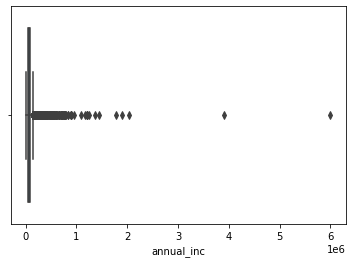

In [33]:
sbn.boxplot(df_noNA['annual_inc'])
plt.show()

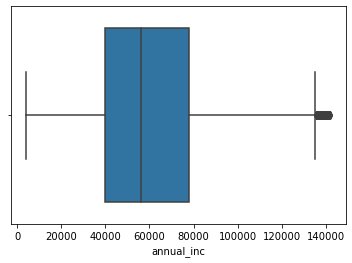

In [34]:
sbn.boxplot(df_noNA[df_noNA['annual_inc'] < df_noNA['annual_inc'].quantile(0.95)]['annual_inc'])
plt.show()

*Observation*: With 0.90 percentile, box plot is looking good after all outline removal.
need to make sure, date set to have value less than 0.98 percentile.

In [35]:
df_noNA = df_noNA[df_noNA['annual_inc'] < df_noNA['annual_inc'].quantile(0.95)]

In [36]:
df_noNA['annual_inc'].describe()

count     37682.000000
mean      61078.034434
std       27786.361842
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

In [37]:
df_noNA['int_rate'].describe()

count    37682.000000
mean        11.966983
std          3.696435
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [38]:
df_noNA['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [39]:
df_noNA['open_acc'].describe()

count    37682.000000
mean         9.190622
std          4.349051
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

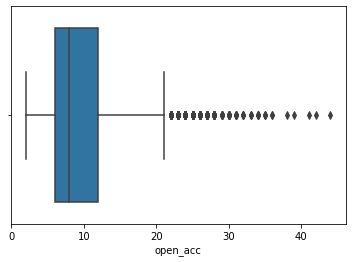

In [40]:
sbn.boxplot(df_noNA['open_acc'])
plt.show()

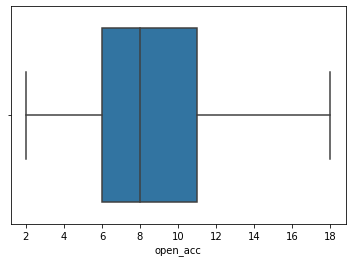

In [41]:
sbn.boxplot(df_noNA[df_noNA['open_acc'] < df_noNA['open_acc'].quantile(0.97)]['open_acc'])
plt.show()

In [42]:
# Observation: With 0.97 percentile, box plot is looking good after all outline removal.
# need to make sure, date set to have value less than 0.97 percentile.
df_noNA = df_noNA[df_noNA['open_acc'] < df_noNA['open_acc'].quantile(0.97)]

In [43]:
df_noNA['loan_amnt'].describe()

count    36391.000000
mean     10797.897145
std       7138.675430
min        500.000000
25%       5000.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

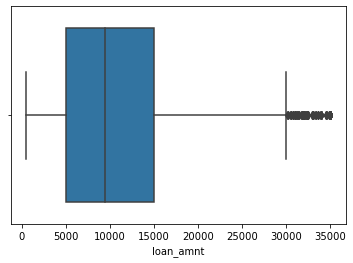

In [44]:
sbn.boxplot(df_noNA['loan_amnt'])
plt.show()

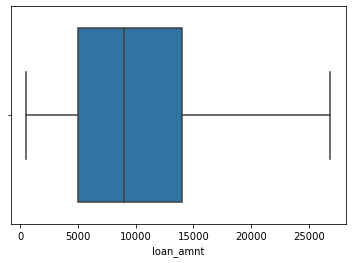

In [45]:
sbn.boxplot(df_noNA[df_noNA['loan_amnt'] < df_noNA['loan_amnt'].quantile(0.97)]['loan_amnt'])
plt.show()

In [46]:
# Observation: With 0.97 percentile, box plot is looking good after all outline removal.
# need to make sure, date set to have value less than 0.97 percentile.
df_noNA = df_noNA[df_noNA['loan_amnt'] < df_noNA['loan_amnt'].quantile(0.97)]

# Bi-variant Analysis

For uni-variant analysis, we need to create bins from existing numeric data

In [47]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000]
bin_labels=['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120k+']
df_noNA['annual_inc_bin'] = pd.cut(df_noNA['annual_inc'], bins, labels=bin_labels)

In [48]:
bins = [0, 5, 10, 15, 20, 25]
bin_labels=['0-5', '5-10', '10-15', '15-20', '20+']
df_noNA['dti_bin'] = pd.cut(df_noNA['dti'], bins, labels=bin_labels)

In [49]:
bins = [0, 5, 10, 15, 20, 25]
bin_labels=['Very Low', 'Low', 'Mid', 'High', 'Very-High']
df_noNA['int_rate_bin'] = pd.cut(df_noNA['int_rate'], bins, labels=bin_labels)

### Comapre loan purpose with Charged-off percentage

In [50]:
df_year_purpose = df_noNA.groupby(['issue_year','purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_year_purpose['total_loan'] = df_year_purpose['Charged Off'] + df_year_purpose['Current'] + df_year_purpose['Fully Paid']
df_year_purpose['charged_off_perc'] = 100 * df_year_purpose['Charged Off']/df_year_purpose['total_loan']

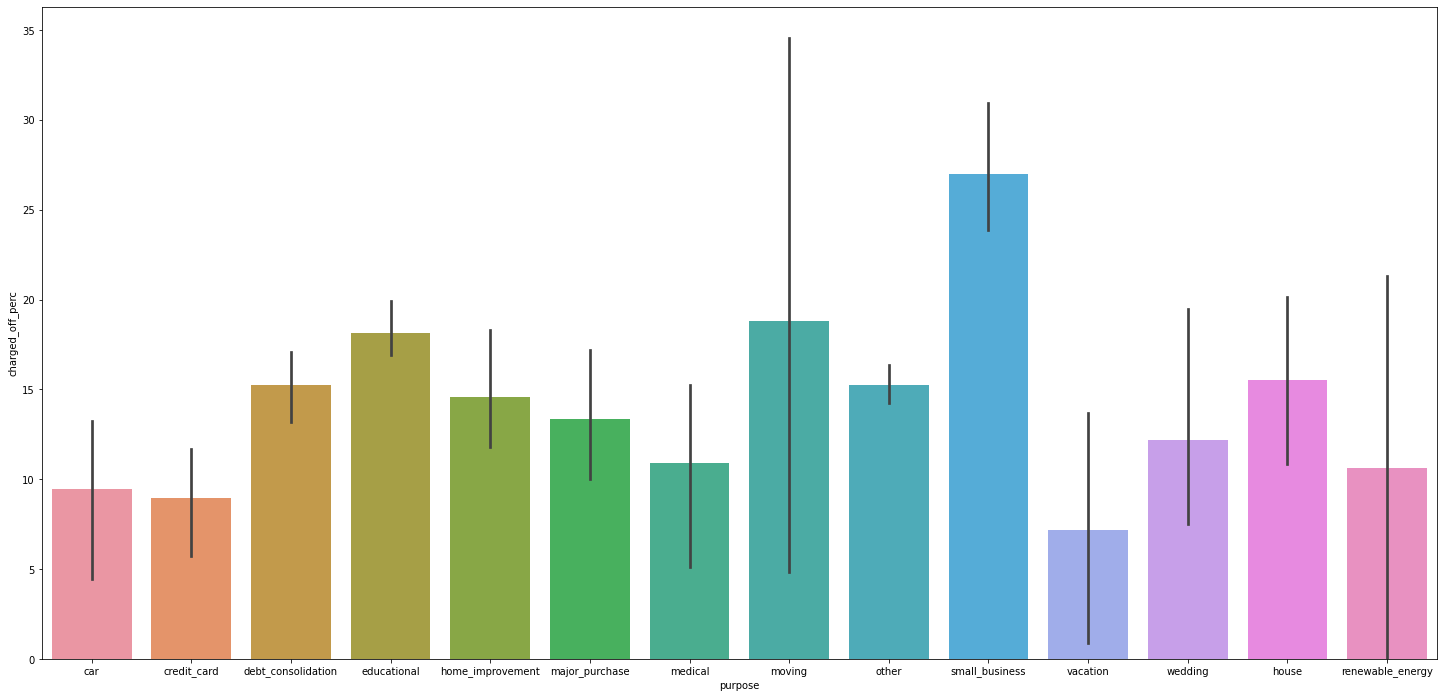

In [51]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_year_purpose, x='purpose', y='charged_off_perc')
plt.show()

## Observation: 
Loans taken for "small business" are the one for which "charge off" percentage is highest

### Comapre Applicant Annual income with Charged-off percentage

In [52]:
df_annual_inc_loan = df_noNA.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_annual_inc_loan['total_loan'] = df_annual_inc_loan['Charged Off'] + df_annual_inc_loan['Current'] + df_annual_inc_loan['Fully Paid']
df_annual_inc_loan['charged_off_perc'] = 100 * df_annual_inc_loan['Charged Off']/df_annual_inc_loan['total_loan']

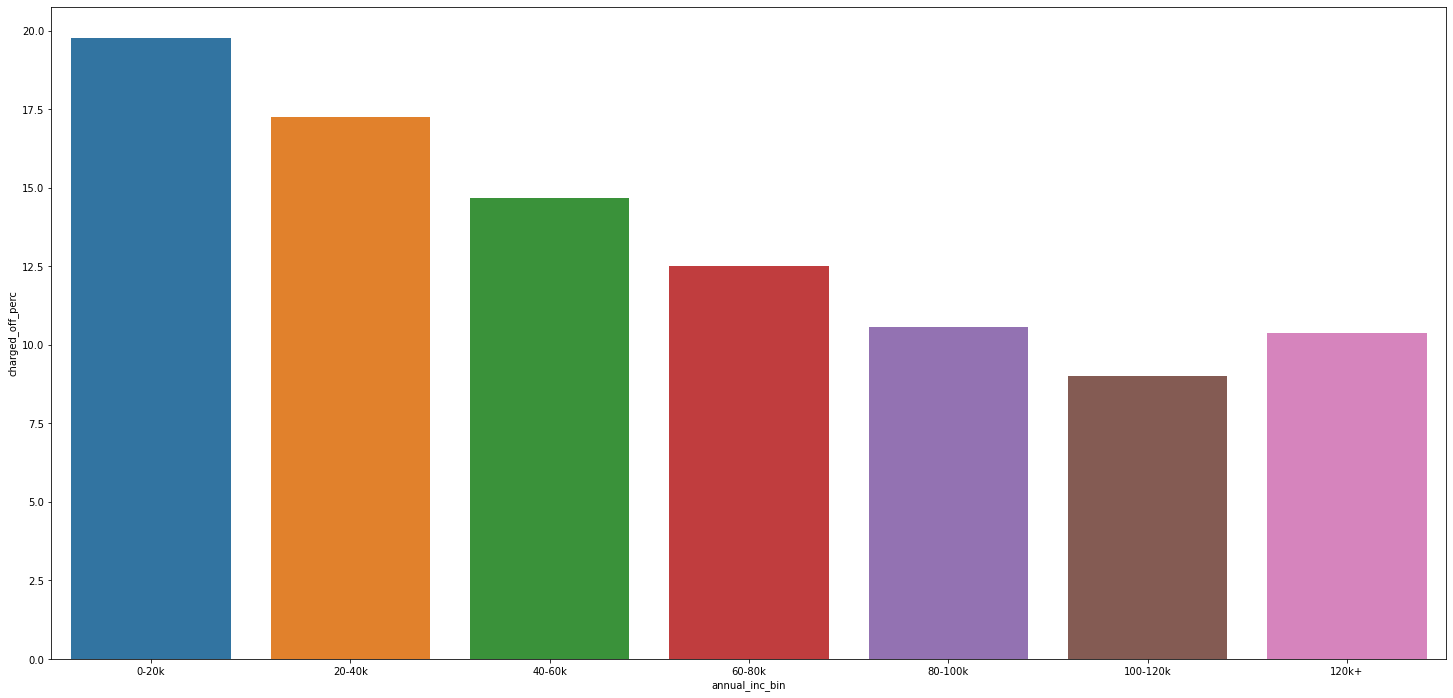

In [53]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_annual_inc_loan, x='annual_inc_bin', y='charged_off_perc')
plt.show()

## Observation: 
Less salary individuals (0-20k) are the one for which "Charged Off" percentage is highest.

### Comapre Grade with Charged-off percentage

In [54]:
df_grade_loan = df_noNA.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_grade_loan['total_loan'] = df_grade_loan['Charged Off'] + df_grade_loan['Current'] + df_grade_loan['Fully Paid']
df_grade_loan['charged_off_perc'] = 100 * df_grade_loan['Charged Off']/df_grade_loan['total_loan']

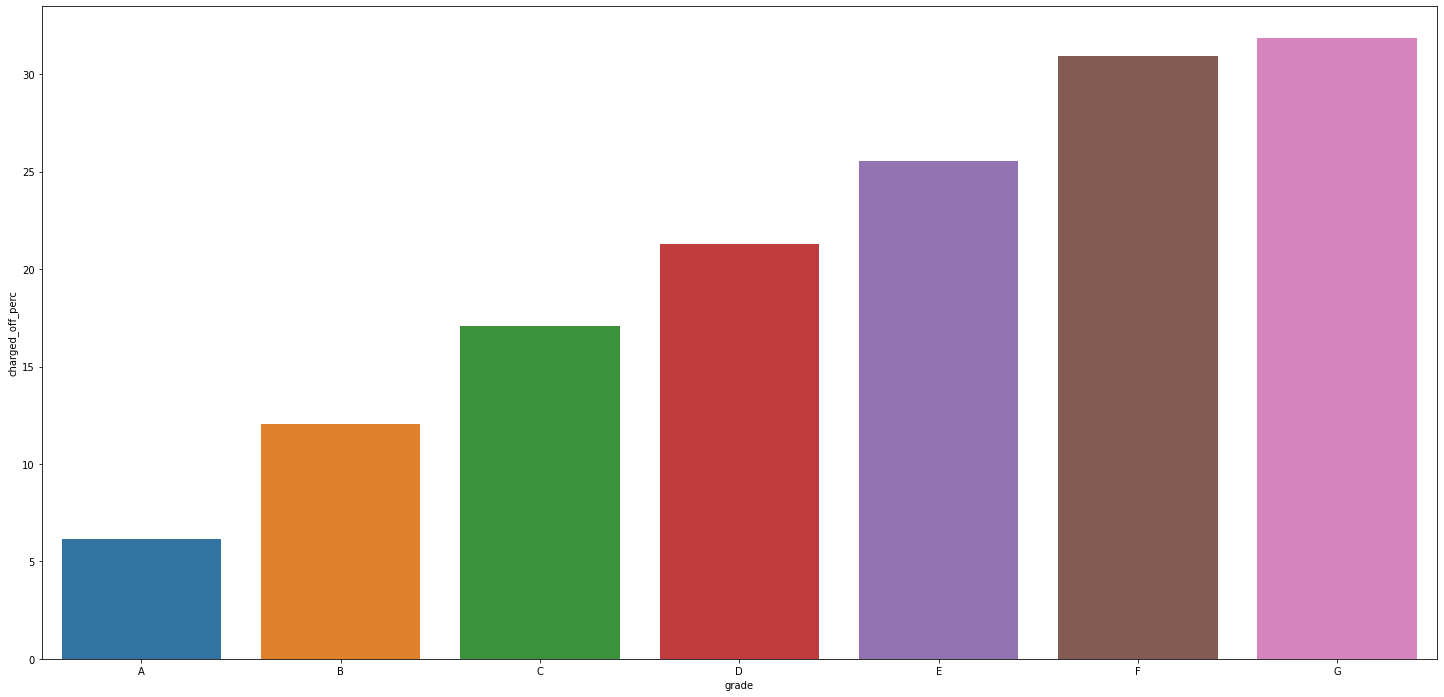

In [55]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_grade_loan, x='grade', y='charged_off_perc')
plt.show()

### Observation: 
Individual with lesser grade tend to have higher "Charged Off" percentage.

### Comapre Employee Length with Charged-off percentage

In [56]:
df_emp_loan = df_noNA.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_emp_loan['total_loan'] = df_emp_loan['Charged Off'] + df_emp_loan['Current'] + df_emp_loan['Fully Paid']
df_emp_loan['charged_off_perc'] = 100 * df_emp_loan['Charged Off']/df_emp_loan['total_loan']

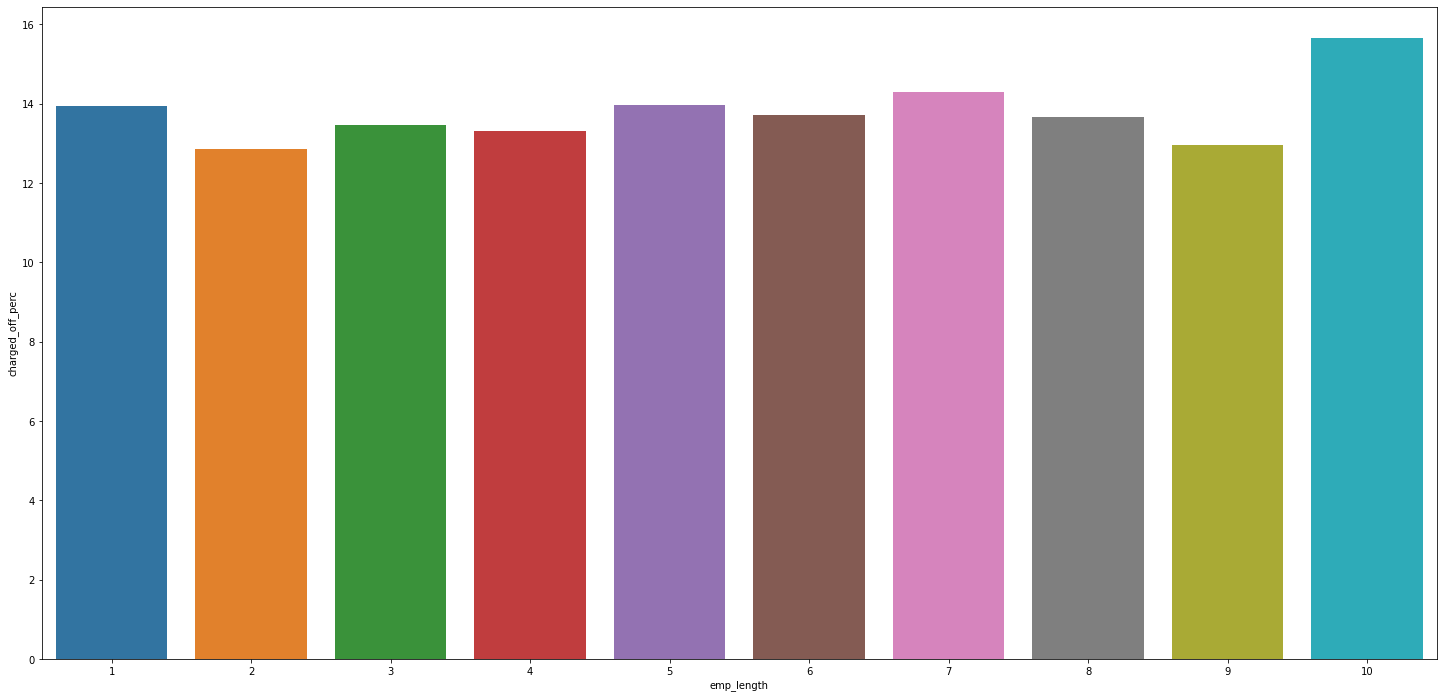

In [57]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_emp_loan, x='emp_length', y='charged_off_perc')
plt.show()

# Observation: 
Employee length is not affecting "Charged Off" percentage, mostly it's aroun 12-4 line. With exception for 10,10+ year where
charge-off percentage is higher

In [58]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
bin_labels=['0-5k', '5-10k', '10-15k', '15-20k', '20-25k', '25-30k', '+30k']
df_noNA['loan_amnt_bin'] = pd.cut(df_noNA['loan_amnt'], bins, labels=bin_labels)

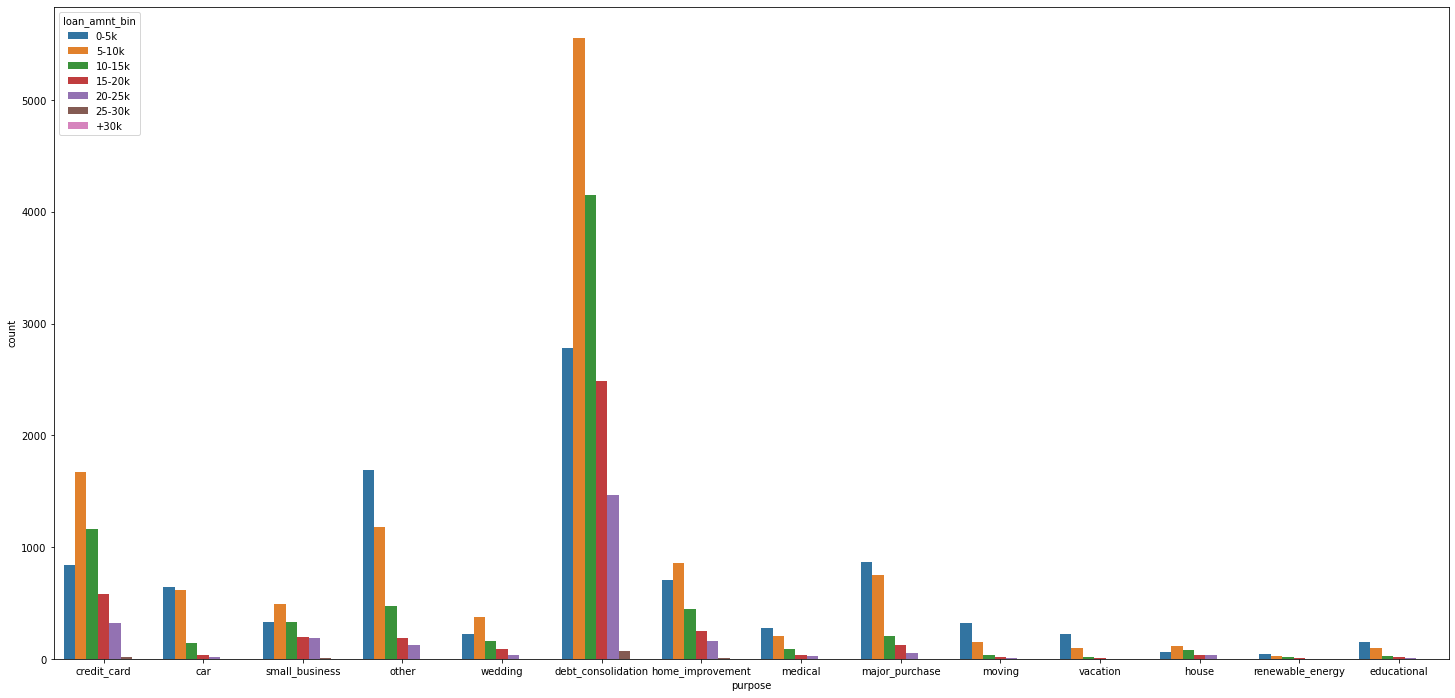

In [59]:
plt.figure(figsize=(25,12))
sbn.countplot(data=df_noNA, x='purpose', hue='loan_amnt_bin')
plt.show()

### Observation:
* Strogest reason to take loan is for "Debt Consolidation", which is common across all range of Annual income
* Normallt, individual with salary range between 5-10k are the one taking most of the loan.

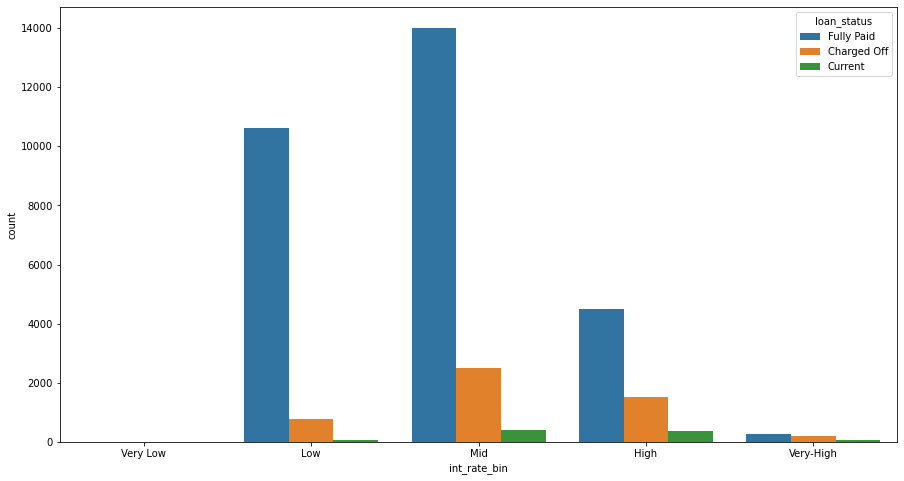

In [60]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='int_rate_bin', hue='loan_status')
plt.show()

### Observation:
* As Loan interest increases, number of loans reduce significantly
* As loan interest increases, number of "Charged-off" increases.
* As loan interest increases, number of "Fully Paid" increases, maybe individual is trying to pay to loan fully then paying higher interest.

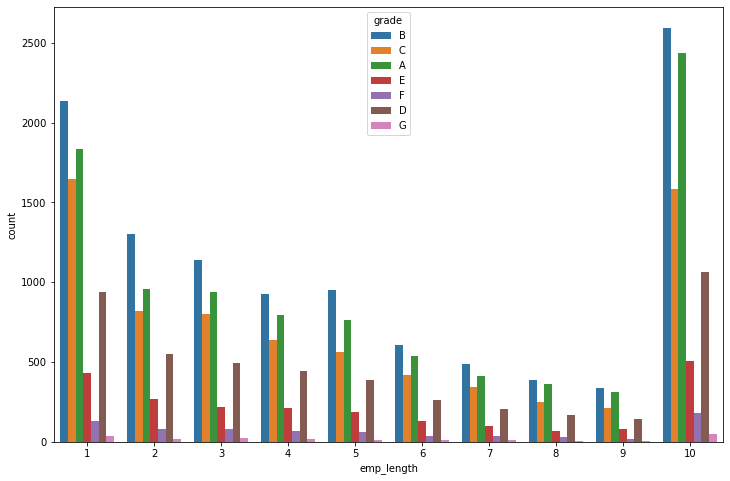

In [61]:
plt.figure(figsize=(12,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='grade')
plt.show()

### Observation:
As Employee service length increases, Grade allocated to Individual increases.
It makes sense, as number of years for individual increases, salary of individual increases and his paying capacity will also increase.

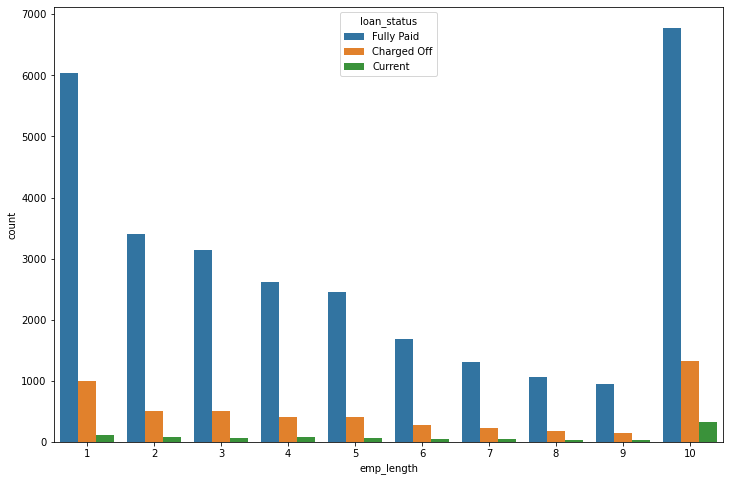

In [62]:
plt.figure(figsize=(12,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='loan_status')
plt.show()

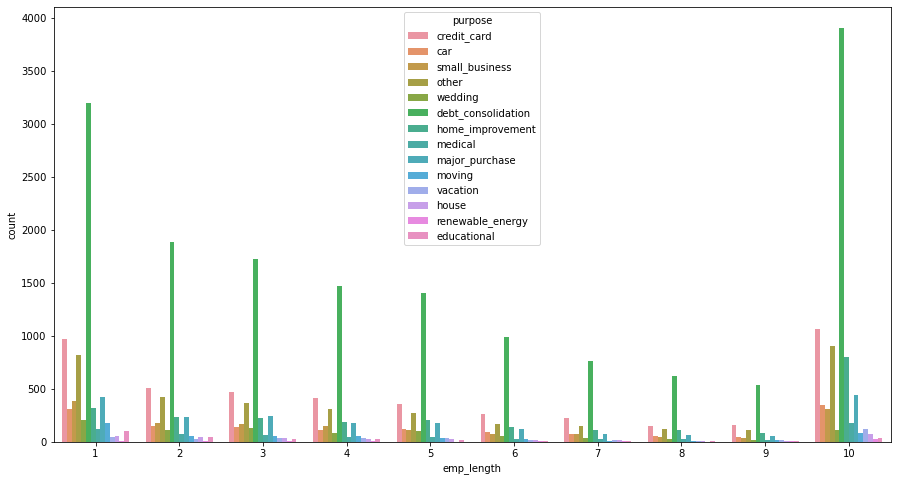

In [63]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='purpose')
plt.show()

### Oservation:
* Across all individuals of employment service, loan is taken for Dept-consolidation

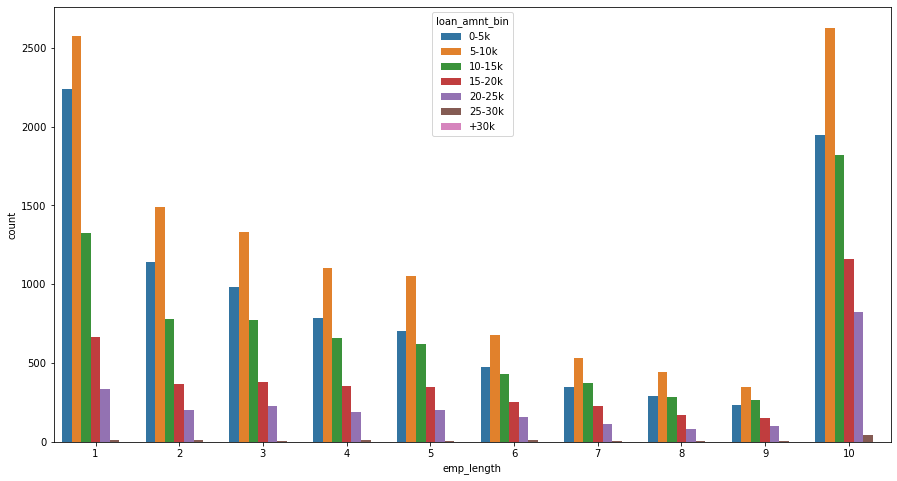

In [64]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='loan_amnt_bin')
plt.show()

### Observation:
* Across all obervation, mostly loan is taken for small quantity 5-10k, which makes sense as from earlier figures, mostly loan is taken for dept-consolidation

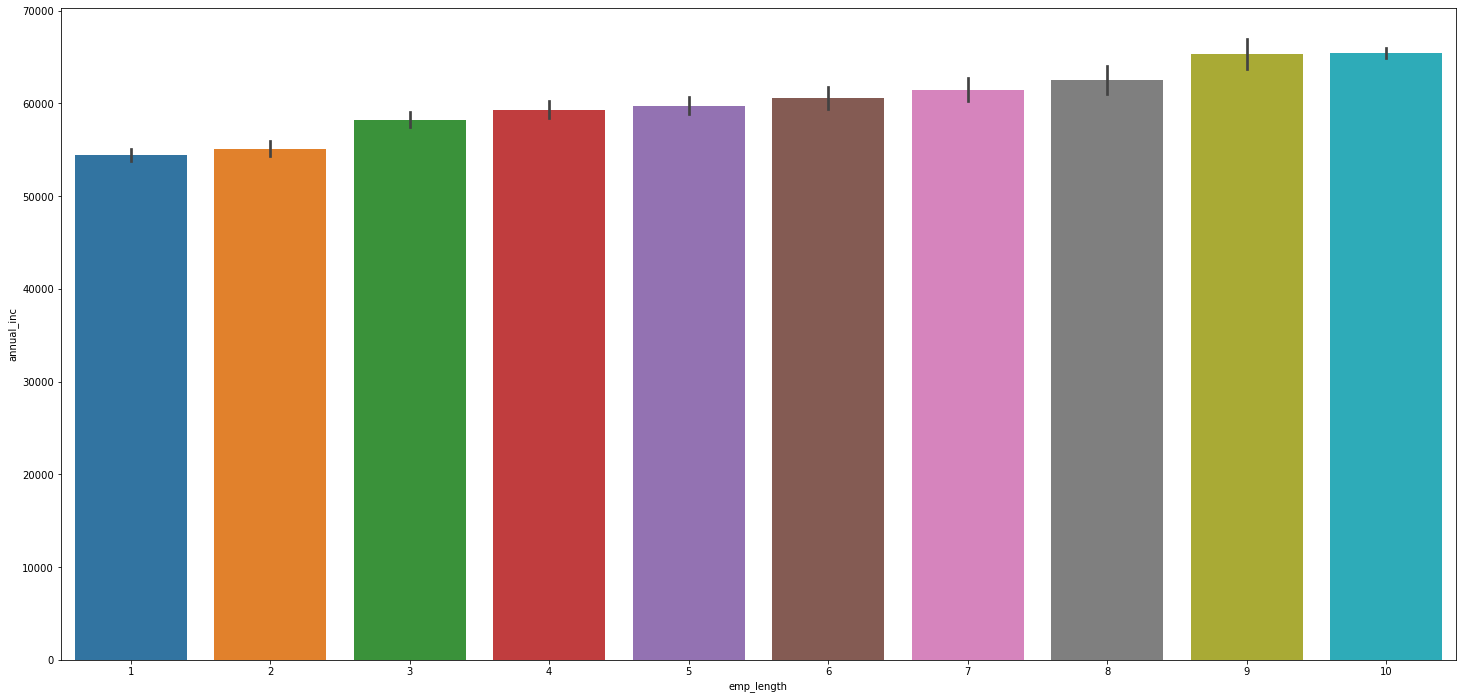

In [65]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_noNA, x='emp_length', y='annual_inc')
plt.show()

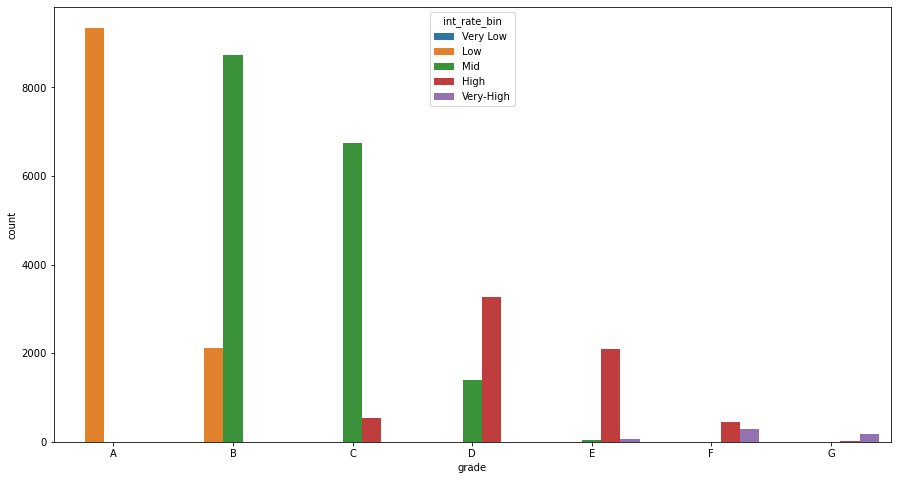

In [66]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='grade', hue='int_rate_bin', order=['A','B','C','D','E','F','G'])
plt.show()

### Observation:
* Interest rate increase with decrease in Grades

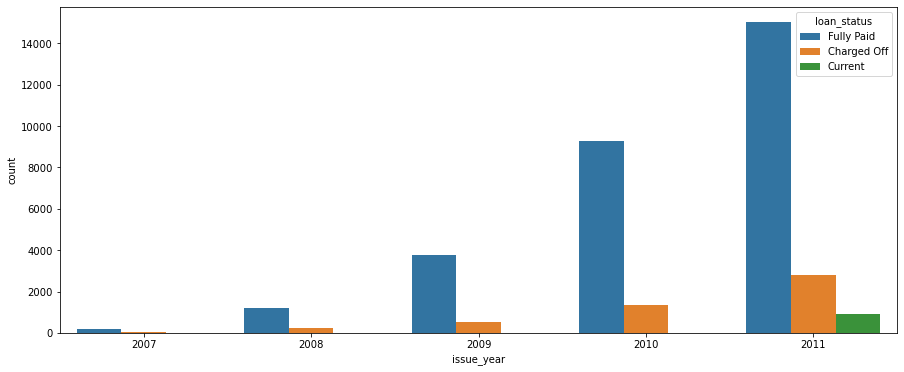

In [67]:
plt.figure(figsize=(15,6))
df_noNA.groupby(['issue_year','issue_month']).loan_status.count().unstack().fillna(0).reset_index()
sbn.countplot(data=df_noNA, x='issue_year', hue='loan_status')
plt.show()

### Observation:
* No of loans are increasing each year, which seems to be the reason for increase in Charged-off applications.

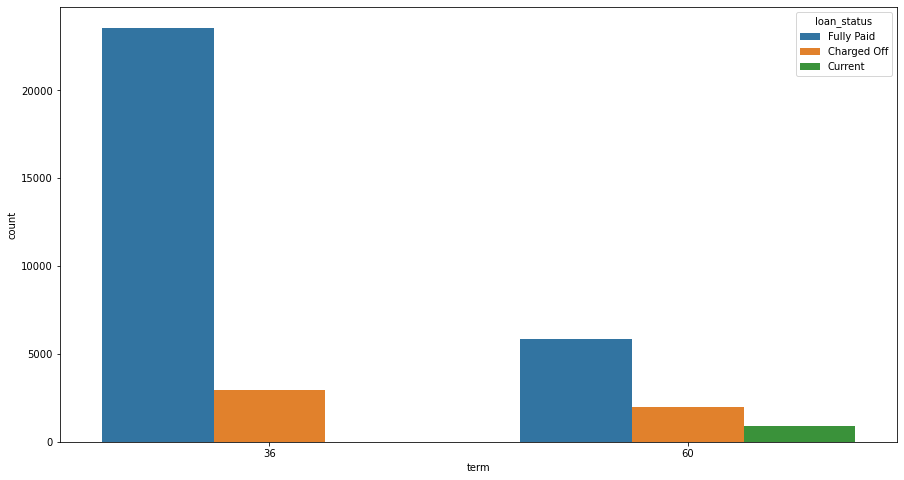

In [68]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='term', hue='loan_status')
plt.show()

### Observation:
* Term month does not have much impact on "charge-off", they do have impact on "Fully Paid". Lower the term, more number of "Fully Paid" individuals.

<Figure size 2880x1800 with 0 Axes>

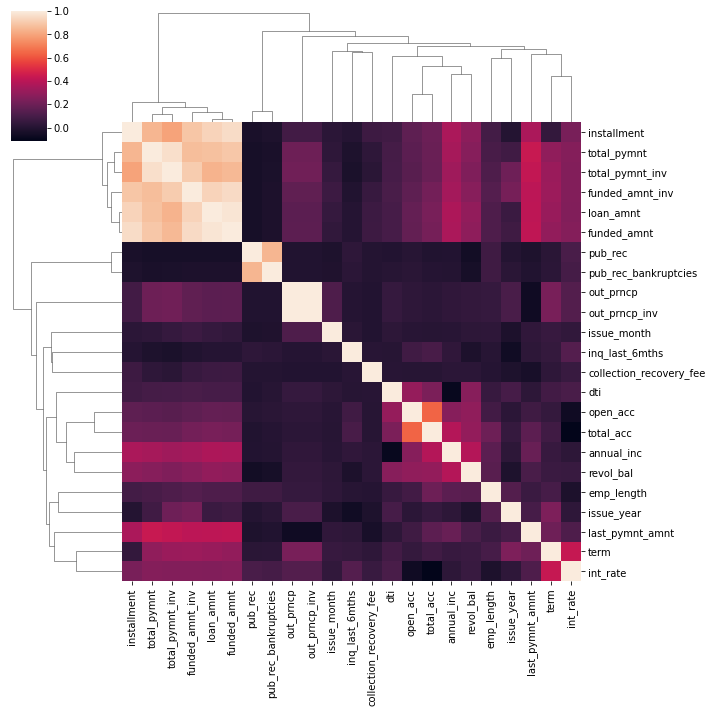

In [69]:
plt.figure(figsize=(40,25))
corr_obj = df_noNA.corr()
sbn.clustermap(corr_obj, annot=False)
plt.show()

Observation: 
Annotation is set to false, as with annotation, analysis is hard, first we will analyse using the Color index to find out co-relation, some of the highly co-related (>= 0.85) columns are following:
1. 'total_pymnt' is highly co-related to total_paymnt_inv, installment, funded_amnt_inv, loan_amnt
2. 'funded_amnt' is highly co-related to 'total_pymnt,total_pymnt_inv,installment,funded_amnt_inv,loan_amnt,funded_amnt'
3. 'installment' is highly co-related to 'funded_amnt, funded_amnt_inv, loan_amnt'

Re-draw co-relation metrics to re-confirm the analysis

<Figure size 1296x864 with 0 Axes>

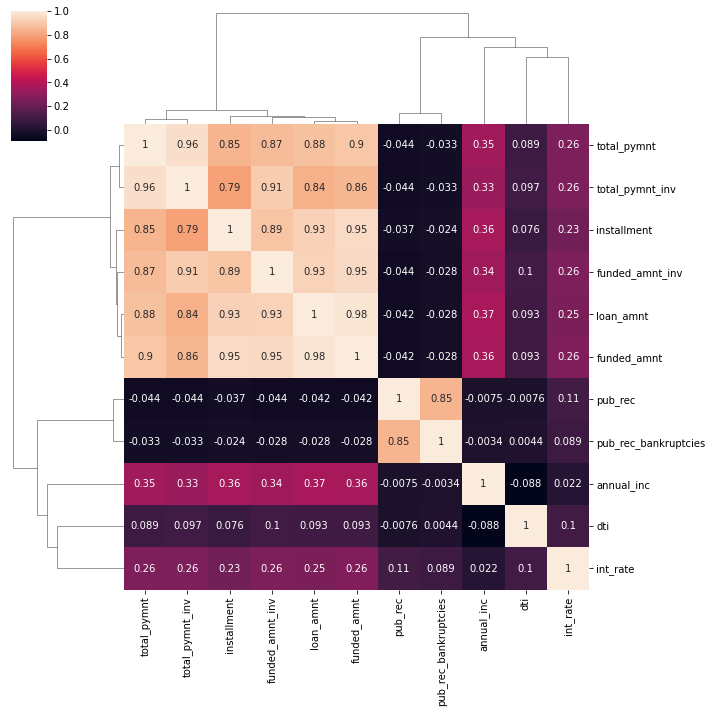

In [70]:
plt.figure(figsize=(18,12))
corr_obj = df_noNA[['loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'installment', 
                    'annual_inc', 
                    'dti', 
                    'pub_rec',
                    'pub_rec_bankruptcies', 
                    'int_rate',
                   'total_pymnt',
                   'total_pymnt_inv']].corr()
sbn.clustermap(corr_obj, annot=True)
plt.show()

=============================================
=============================================

### Final Results:
* Most of applicants take loan for "Dept-consolidation"
* Loan is taken in small quantity: 5-10k
* Loan taken for "small-business" purpose, charge-off the most.
* As salary of individual increase, his paying capacity increases and thus charge-off are less.
* Higher interest rates when applied leads to higher charge-off
* Low salary individuals (0-20k) are more likely to "charge-off" loan.